<a href="https://colab.research.google.com/github/NeilySutherland/ST1CapstoneProjectNYS/blob/main/Capstone_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.9.1

In [ ]:
# import system libraries
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import libraries that don't seem to work on Google Colab
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
#Set data directory to my Google Drive
data_dir = '/content/drive/MyDrive/CapstoneData'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

# How has the data been distributed across the directory?

In [ ]:
#Find first part of data
df.head(5)

filepaths       labels
0  /content/drive/MyDrive/CapstoneData/not_smokin...  not_smoking
1  /content/drive/MyDrive/CapstoneData/not_smokin...  not_smoking
2  /content/drive/MyDrive/CapstoneData/not_smokin...  not_smoking
3  /content/drive/MyDrive/CapstoneData/not_smokin...  not_smoking
4  /content/drive/MyDrive/CapstoneData/not_smokin...  not_smoking

In [ ]:
#Find second part of data
df.tail(5)

filepaths   labels
3270  /content/drive/MyDrive/CapstoneData/smoking/bb...  smoking
3271  /content/drive/MyDrive/CapstoneData/smoking/bb...  smoking
3272  /content/drive/MyDrive/CapstoneData/smoking/bb...  smoking
3273  /content/drive/MyDrive/CapstoneData/smoking/bb...  smoking
3274  /content/drive/MyDrive/CapstoneData/smoking/bb...  smoking

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  3275 non-null   object
 1   labels     3275 non-null   object
dtypes: object(2)
memory usage: 51.3+ KB


As seen in the "labels" section, the data has been organised with the non-smoking images at the top and the smoking images at the bottom.
There are a combined total of 3,275 entries separated into two columns.

# Question 1: How are the images displayed on a grid?
+ Convert the images to regular colour (Google Colab uses inverted colours by default)

Image 1 height = 720
Image 1 width = 958
Image 2 height = 640
Image 2 width = 960


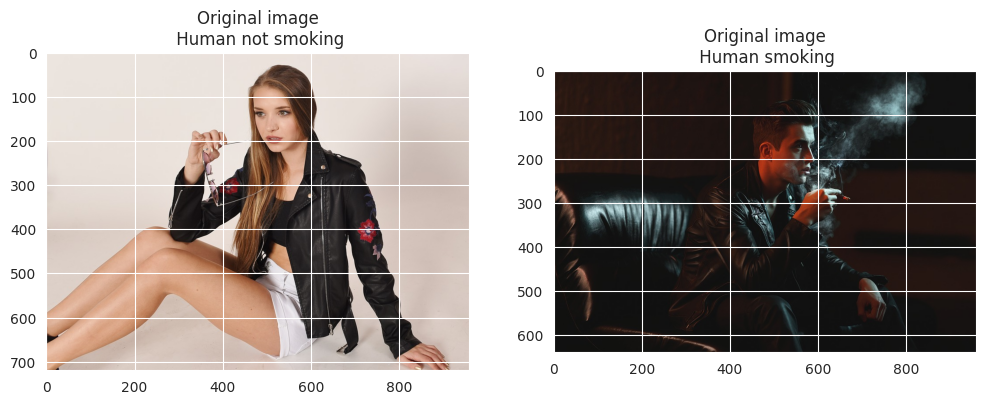

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#Define image paths
image_path_1 = '/content/drive/MyDrive/CapstoneData/not_smoking/ggg723.jpg'
src1 = cv2.imread(image_path_1)
image_path_2 = '/content/drive/MyDrive/CapstoneData/smoking/ggg063.jpg'
src2 = cv2.imread(image_path_2)

#Convert images to regular colour
image_1 = cv2.cvtColor(src1, cv2.COLOR_RGB2BGR)
image_2 = cv2.cvtColor(src2, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(image_1), plt.title('Original image\n Human not smoking')
plt.subplot(122)
plt.imshow(image_2), plt.title('Original image\n Human smoking')

#Display dimentions of images
height1 = image_1.shape[0]
width1 = image_1.shape[1]
height2 = image_2.shape[0]
width2 = image_2.shape[1]
print(f"Image 1 height = {height1}\nImage 1 width = {width1}")
print(f"Image 2 height = {height2}\nImage 2 width = {width2}")

#Question 2: How do the images from different datasets looks when geometrically transformed?
+ Rotate the images
+ Flip the images
+ Transpose the images

(<matplotlib.image.AxesImage at 0x788dadb78d00>,
 Text(0.5, 1.0, ' \n Transposed smoking human'))

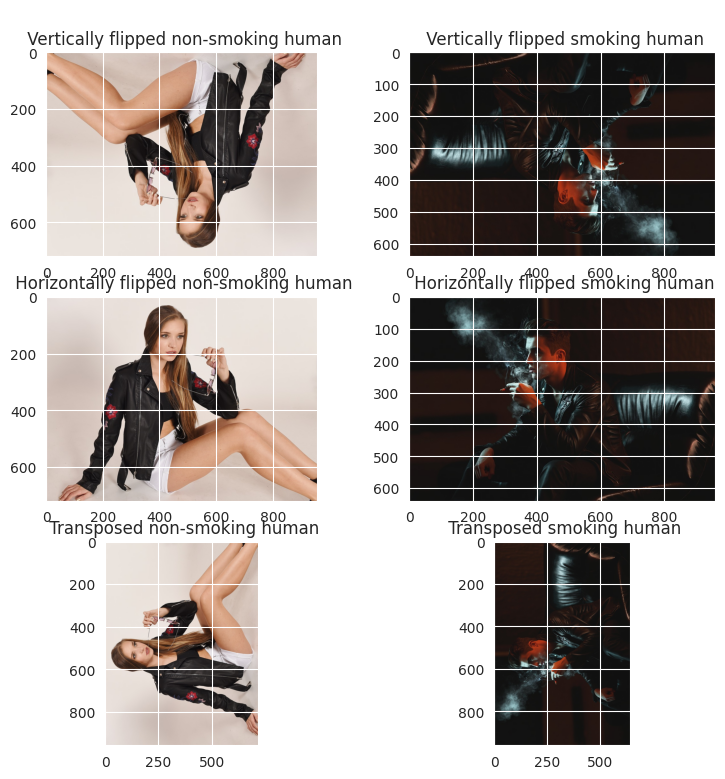

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image_path_1 = '/content/drive/MyDrive/CapstoneData/not_smoking/ggg723.jpg'
src1 = cv2.imread(image_path_1)
image_path_2 = '/content/drive/MyDrive/CapstoneData/smoking/ggg063.jpg'
src2 = cv2.imread(image_path_2)

image_1 = cv2.cvtColor(src1, cv2.COLOR_RGB2BGR)
image_2 = cv2.cvtColor(src2, cv2.COLOR_RGB2BGR)

#Vertical flip
flip_image_v1=cv2.flip(image_1,0)
flip_image_v2=cv2.flip(image_2,0)
#Horizontal flip
flip_image_h1=cv2.flip(image_1,1)
flip_image_h2=cv2.flip(image_2,1)
#Transpose
transp_image_1=cv2.transpose(image_1,1)
transp_image_2=cv2.transpose(image_2,1)

plt.figure(figsize=(9,9))
plt.subplot(321)
plt.imshow(flip_image_v1), plt.title(' \n Vertically flipped non-smoking human')
plt.subplot(322)
plt.imshow(flip_image_v2), plt.title(' \n Vertically flipped smoking human')
plt.subplot(323)
plt.imshow(flip_image_h1), plt.title(' \n Horizontally flipped non-smoking human')
plt.subplot(324)
plt.imshow(flip_image_h2), plt.title(' \n Horizontally flipped smoking human')
plt.subplot(325)
plt.imshow(transp_image_1), plt.title(' \n Transposed non-smoking human')
plt.subplot(326)
plt.imshow(transp_image_2), plt.title(' \n Transposed smoking human')

#Question 3: How will the images look after various colour and texture tweaks?
+ Gray scale the images
+ Denoise the images
+ Blur the images

(<Axes: title={'center': 'Blurred image(heavy)\n Human smoking'}>,
 Text(0.5, 1.0, 'Blurred image(heavy)\n Human smoking'))

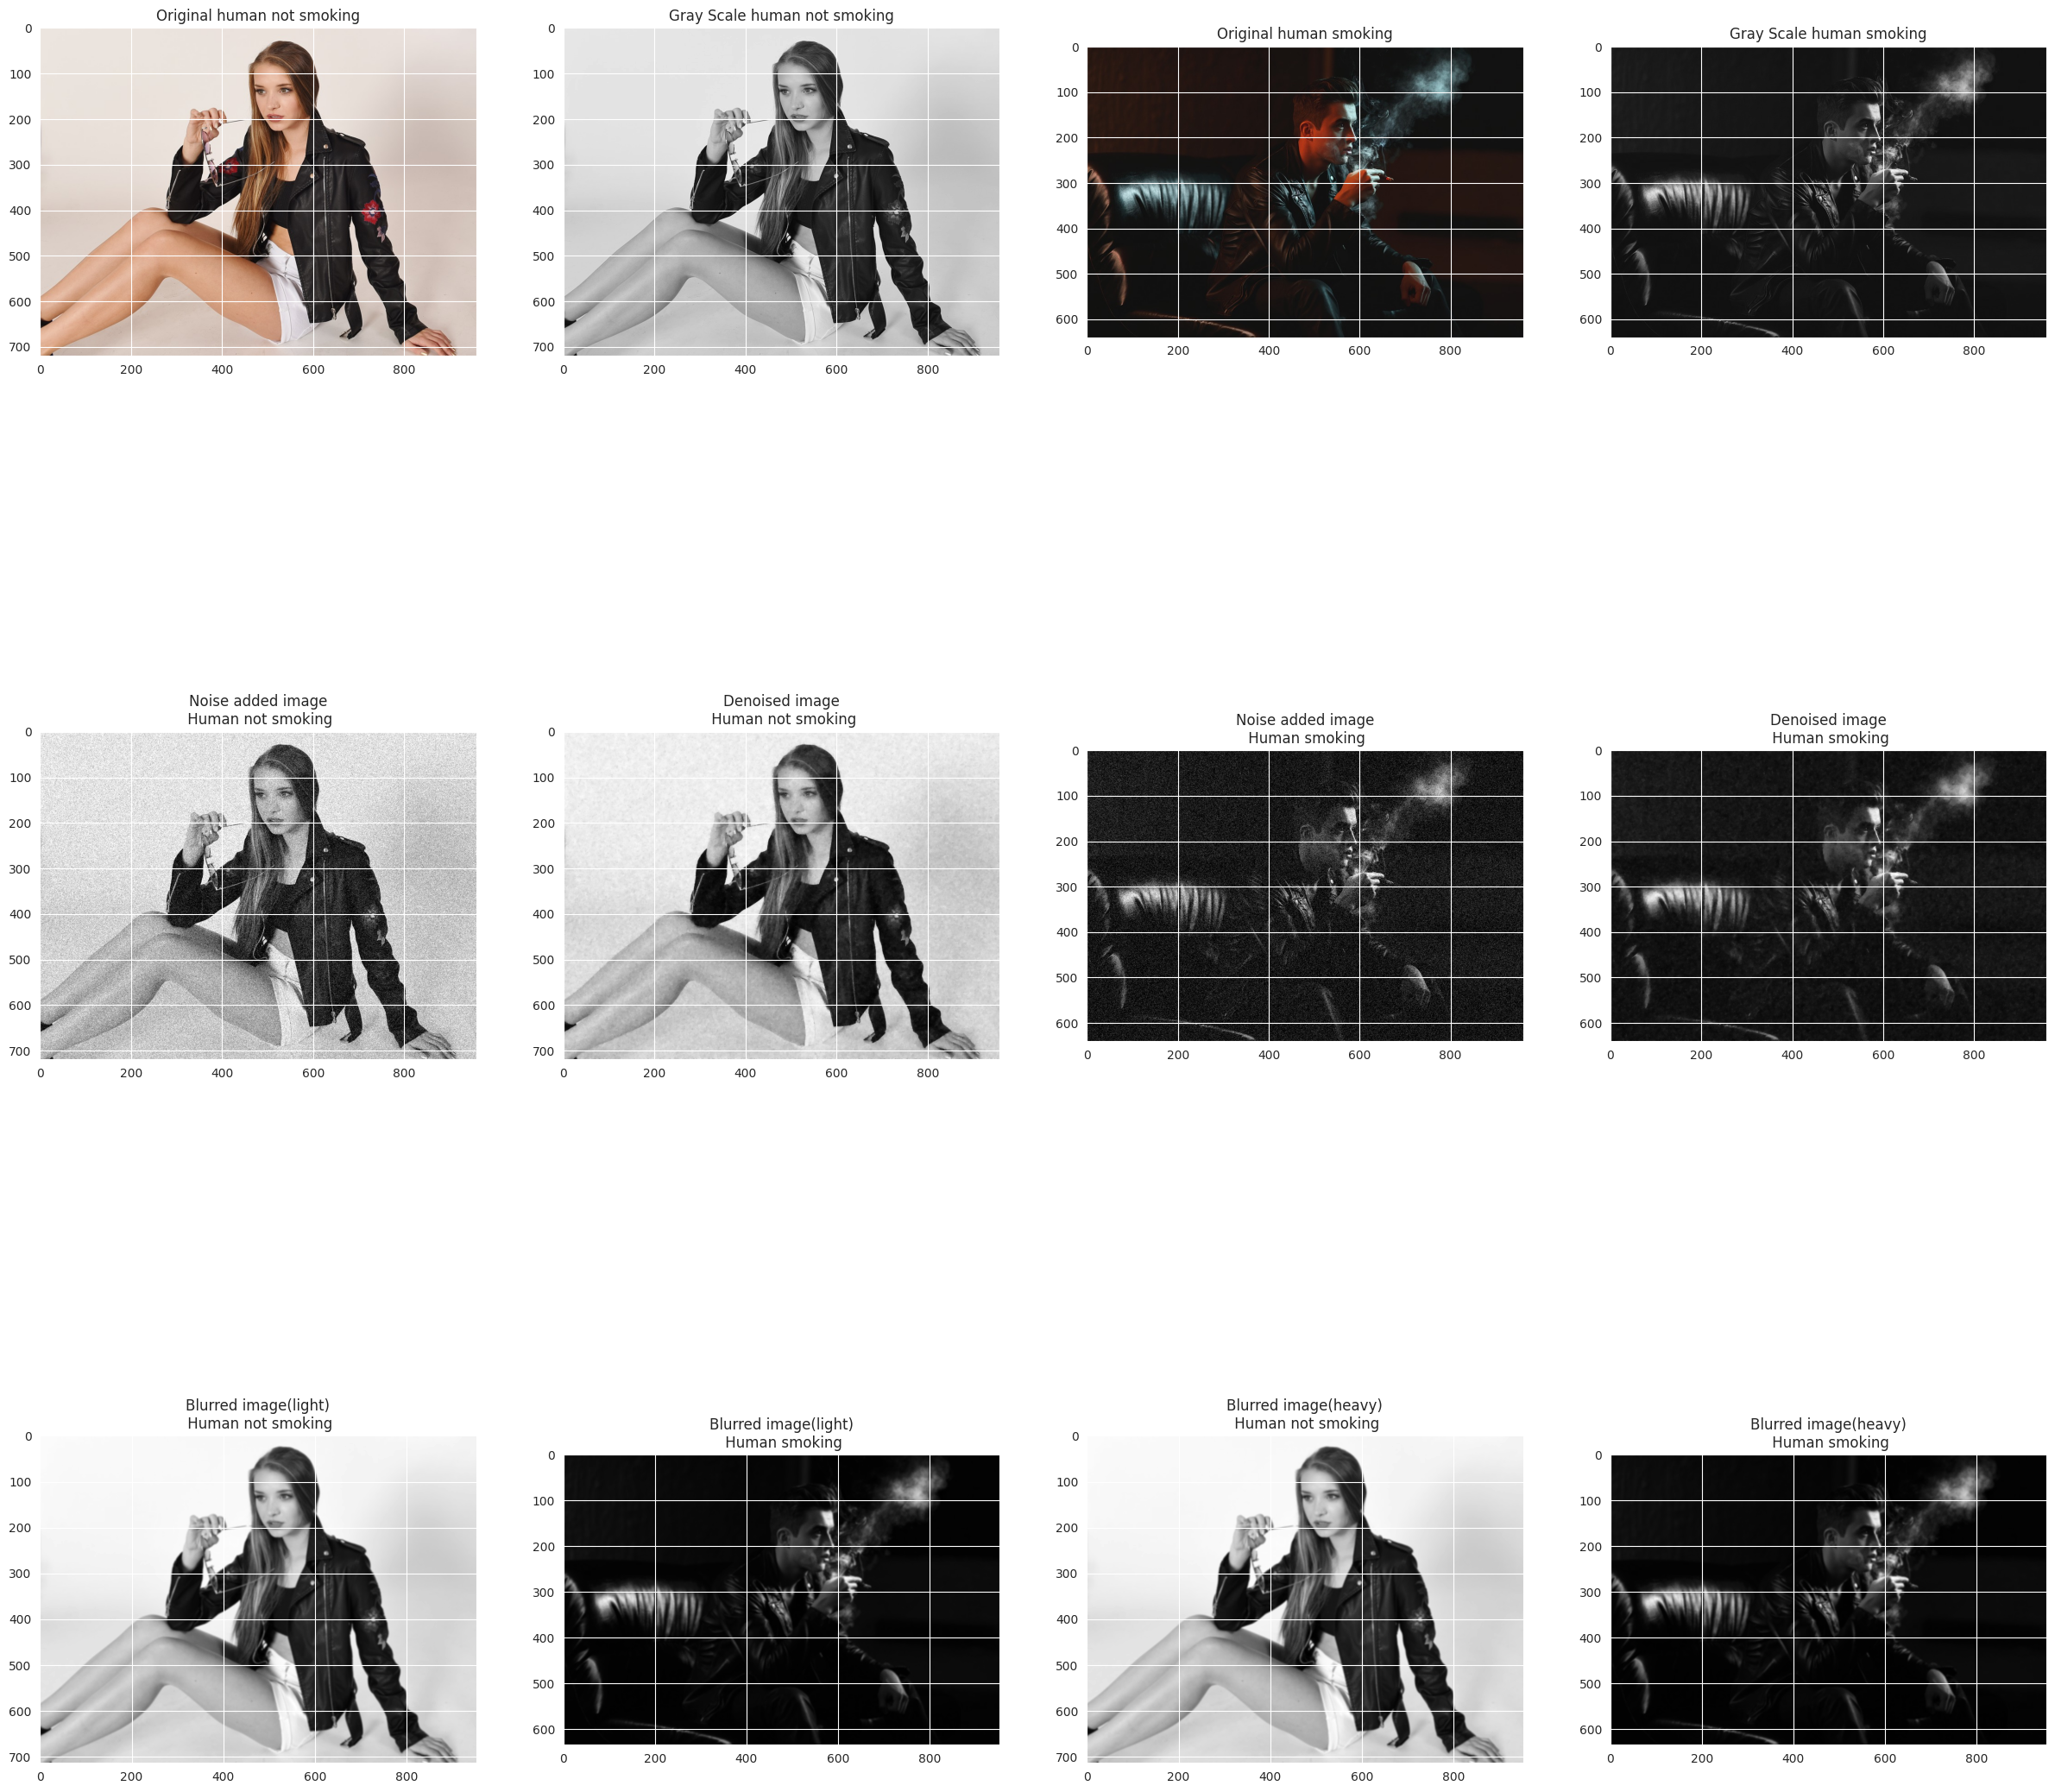

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

image_path_1 = '/content/drive/MyDrive/CapstoneData/not_smoking/ggg723.jpg'
src1 = cv2.imread(image_path_1)
image_path_2 = '/content/drive/MyDrive/CapstoneData/smoking/ggg063.jpg'
src2 = cv2.imread(image_path_2)

image_1 = cv2.cvtColor(src1, cv2.COLOR_RGB2BGR)
image_2 = cv2.cvtColor(src2, cv2.COLOR_RGB2BGR)

#Convert images to gray scale
image_1_gray = skic.rgb2gray(image_1)
image_2_gray = skic.rgb2gray(image_2)

# Add Gaussian noise and denoise for both images
image_1_n = sku.random_noise(skic.rgb2gray(image_1))
image_1_d = skimage.restoration.denoise_tv_bregman(image_1_n, 5.)
image_2_n = sku.random_noise(skic.rgb2gray(image_2))
image_2_d = skimage.restoration.denoise_tv_bregman(image_2_n, 5.)

#Noise reduction using Gaussian Blur
d=3
image_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(image_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
image_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(image_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
image_1_blur6 = cv2.GaussianBlur(skic.rgb2gray(image_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
image_2_blur6 = cv2.GaussianBlur(skic.rgb2gray(image_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.figure(figsize=(30,30))
#Gray scale images
plt.subplot(341), plt.imshow(image_1),plt.title('Original human not smoking')
plt.subplot(342), plt.imshow(image_1_gray, cmap = 'gray'),plt.title('Gray Scale human not smoking')
plt.subplot(343), plt.imshow(image_2),plt.title('Original human smoking')
plt.subplot(344), plt.imshow(image_2_gray, cmap = 'gray'),plt.title('Gray Scale human smoking')

#Visualising Noising-Denoising images
plt.subplot(345), plt.imshow(image_1_n,cmap = 'gray'), plt.title('Noise added image\n Human not smoking')
plt.subplot(346), plt.imshow(image_1_d,cmap = 'gray'),plt.title('Denoised image\n Human not smoking')
plt.subplot(347), plt.imshow(image_2_n,cmap = 'gray'),plt.title('Noise added image\n Human smoking')
plt.subplot(348), plt.imshow(image_2_d,cmap = 'gray'),plt.title('Denoised image\n Human smoking')

#Visualising Noise Reduction with Gaussian Blurring
plt.subplot(349), plt.imshow(image_1_blur3,cmap = 'gray'), plt.title('Blurred image(light)\n Human not smoking')
plt.subplot(3,4,10), plt.imshow(image_2_blur3,cmap = 'gray'),plt.title('Blurred image(light)\n Human smoking')
plt.subplot(3,4,11), plt.imshow(image_1_blur6,cmap = 'gray'),plt.title('Blurred image(heavy)\n Human not smoking')
plt.subplot(3,4,12), plt.imshow(image_2_blur6,cmap = 'gray'),plt.title('Blurred image(heavy)\n Human smoking')

#Question 4: How discriminative are edge-detecting functions on the given images?

(<Axes: title={'center': 'Image with Corners highlighted\n Smoking'}>,
 Text(0.5, 1.0, 'Image with Corners highlighted\n Smoking'))

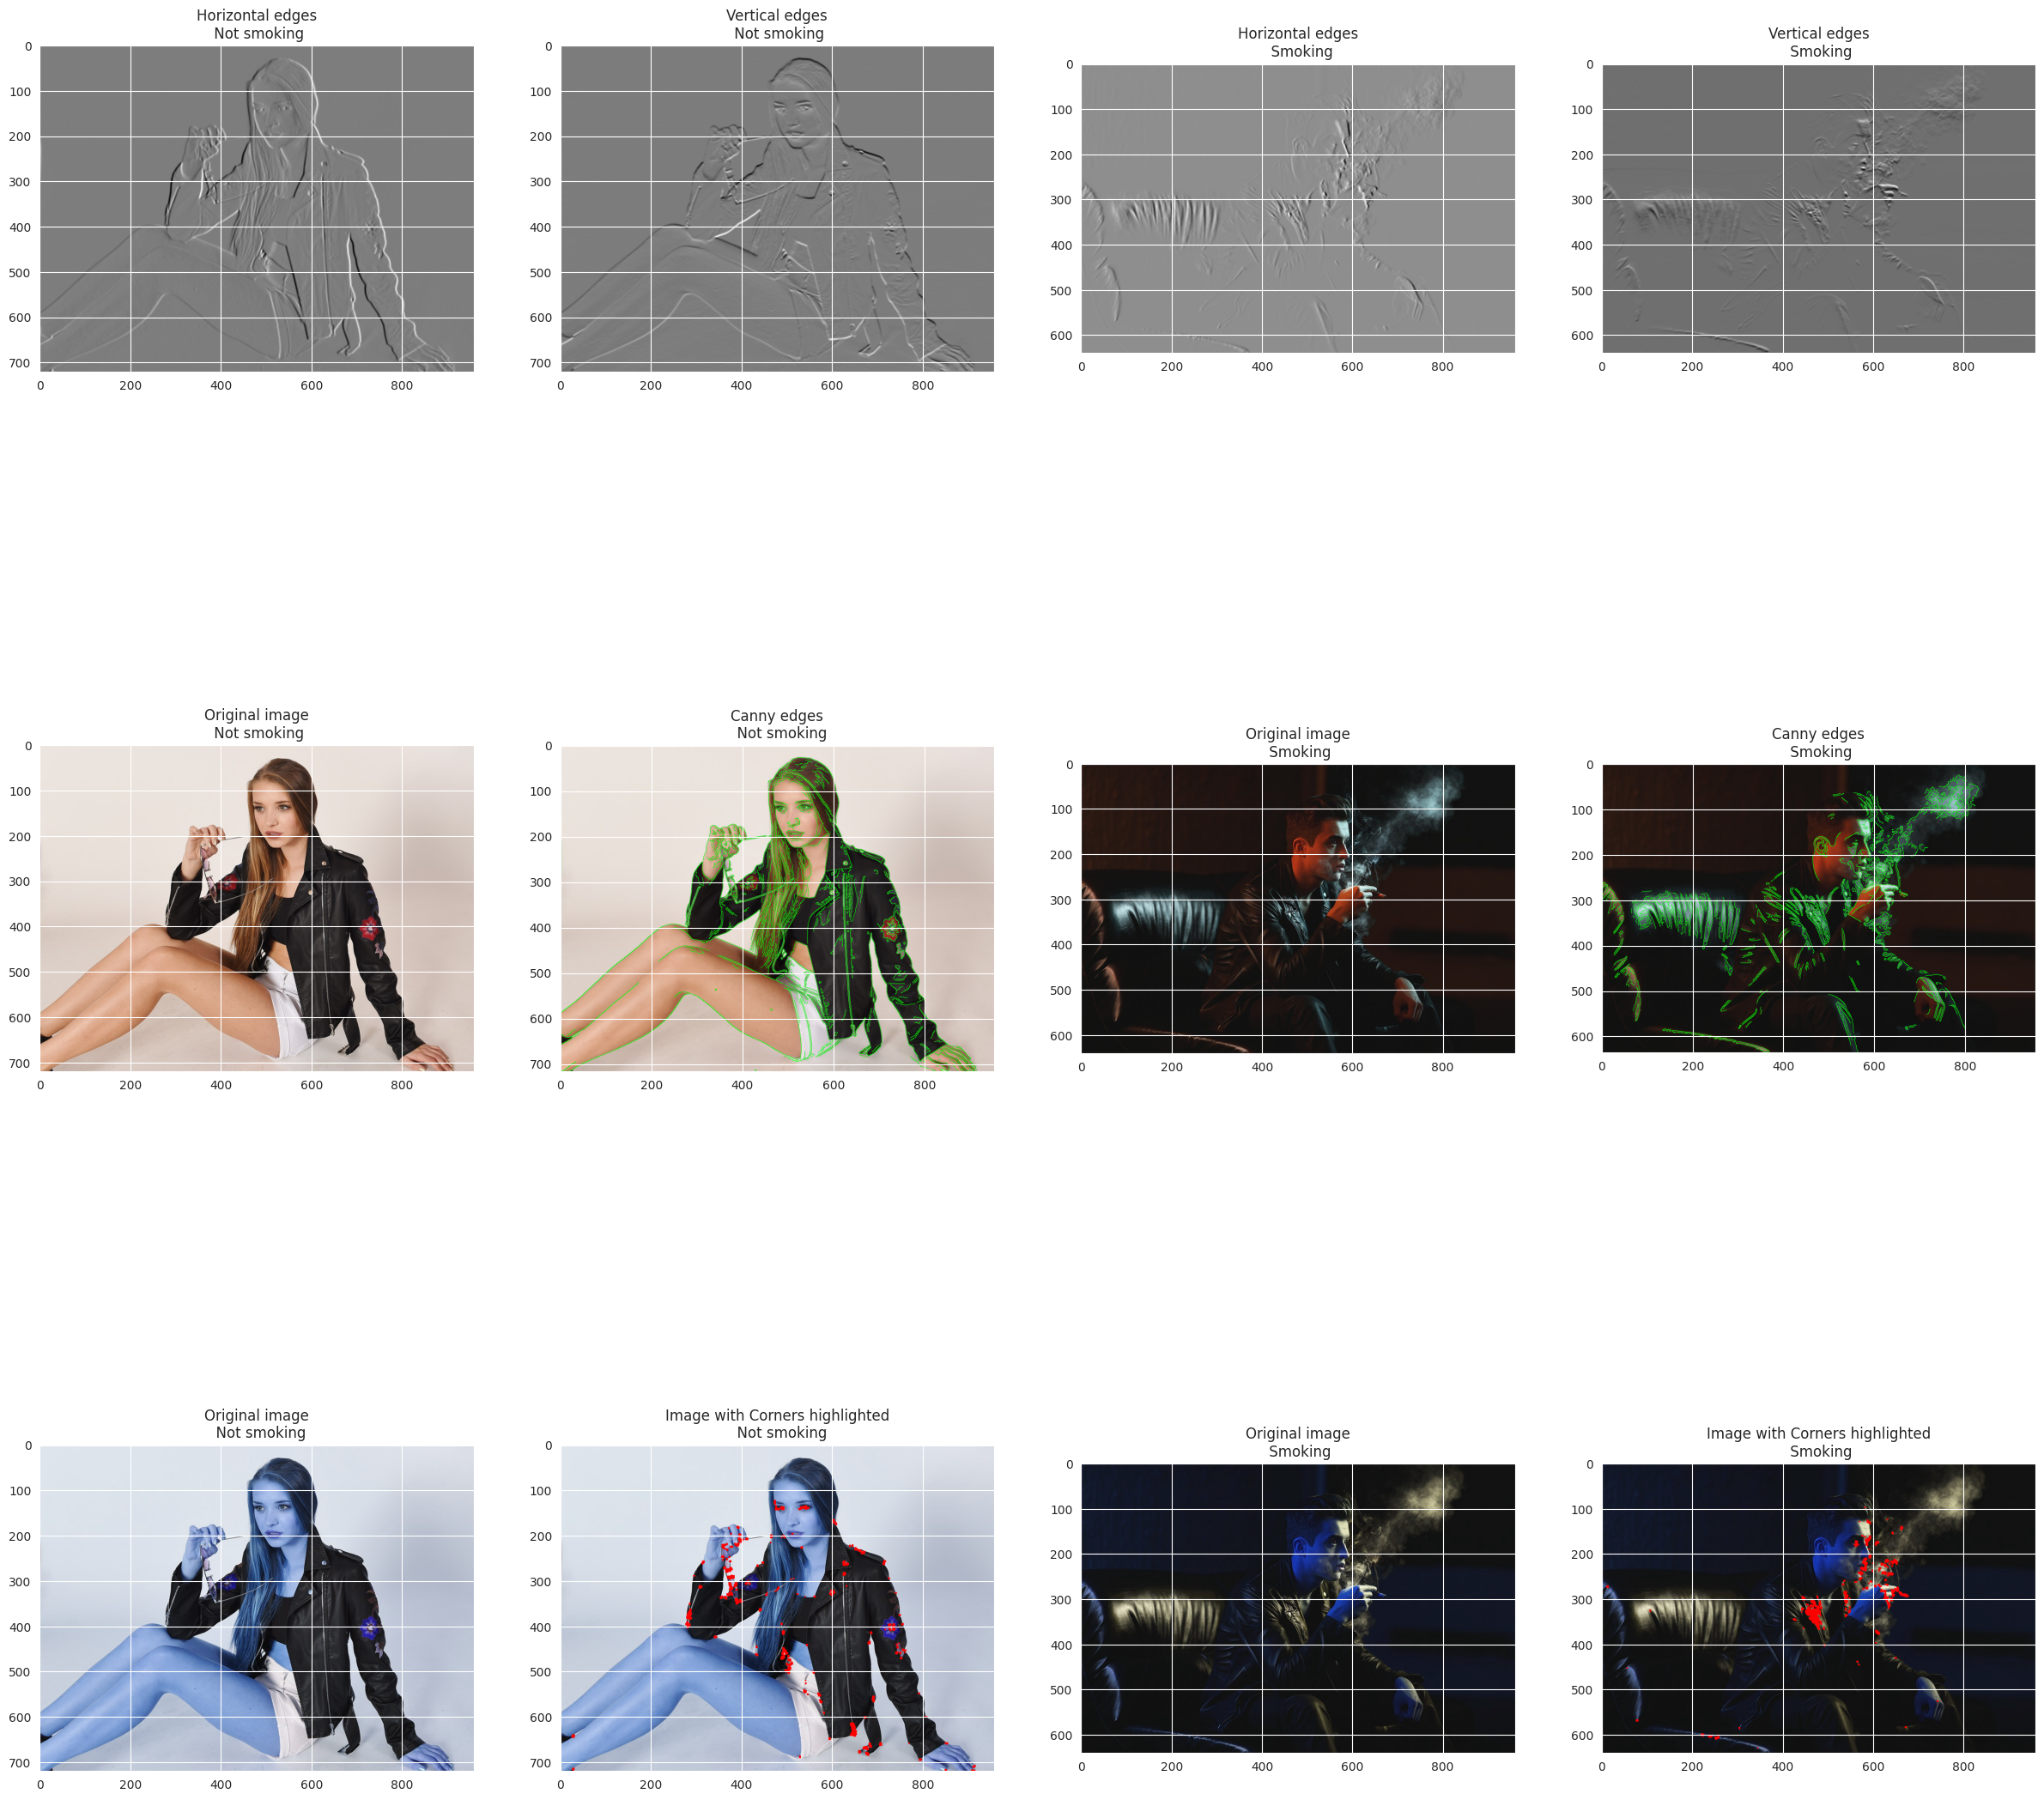

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

image_path_1 = '/content/drive/MyDrive/CapstoneData/not_smoking/ggg723.jpg'
src1 = cv2.imread(image_path_1)
image_path_2 = '/content/drive/MyDrive/CapstoneData/smoking/ggg063.jpg'
src2 = cv2.imread(image_path_2)

image_1 = cv2.cvtColor(src1, cv2.COLOR_RGB2BGR)
image_2 = cv2.cvtColor(src2, cv2.COLOR_RGB2BGR)

#Sobel edge detector on gray scale images
sobel_img_1=cv2.cvtColor(image_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(image_2,cv2.COLOR_BGR2GRAY)
sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)
sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)
#Canny edge detector and threshold selection
th1=30
th2=60

#Set Canny edge threshold to 2 to better outline images
d=2
#Gaussian blur
#This takes pixels on the edges and colours them green
edgeresult_1=image_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)
edgeresult_2=image_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)

#Harris Corner detector
#detecting corners for  image_1
harris_1=image_1.copy()
#greyscale image
gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4
kernel_size=3
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#Plot corners on image with bright red
harris_1[dst>0.01*dst.max()]=[0,0,255]

#detecting corners for image_2
harris_2=image_2.copy()
#greyscale image
gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4
kernel_size=3
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05)
dst = cv2.dilate(dst,None)
harris_2[dst>0.01*dst.max()]=[0,0,255]

#Visualisng Edges and Corners
plt.figure(figsize=(30,30))
#Visualising Sobel Edges
plt.subplot(341), plt.imshow(sobelx_img_1, cmap = 'gray'),plt.title('Horizontal edges\n Not smoking')
plt.subplot(342), plt.imshow(sobely_img_1, cmap = 'gray'),plt.title('Vertical edges\n Not smoking')
plt.subplot(343), plt.imshow(sobelx_img_2, cmap = 'gray'),plt.title('Horizontal edges\n  Smoking')
plt.subplot(344), plt.imshow(sobely_img_2, cmap = 'gray'),plt.title('Vertical edges\n Smoking')
#Visualising Canny Edges
plt.subplot(345), plt.imshow(image_1),plt.title('Original image\n Not smoking')
plt.subplot(346), plt.imshow(edgeresult_1, cmap = 'gray'),plt.title('Canny edges\n  Not smoking')
plt.subplot(347), plt.imshow(image_2),plt.title('Original image\n Smoking')
plt.subplot(348), plt.imshow(edgeresult_2, cmap = 'gray'),plt.title('Canny edges\n Smoking')
#Visualising Corners
plt.subplot(349), plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)),plt.title('Original image\n  Not smoking')
plt.subplot(3,4,10), plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners highlighted\n  Not smoking')
plt.subplot(3,4,11), plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Smoking')
plt.subplot(3,4,12), plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners highlighted\n Smoking')


#Question 5: How do the images appear in histogram equilization when affected by the same lighting?
+ Put both images in similar lighting

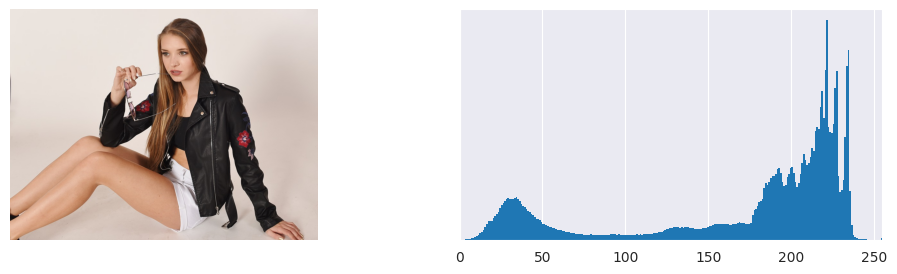

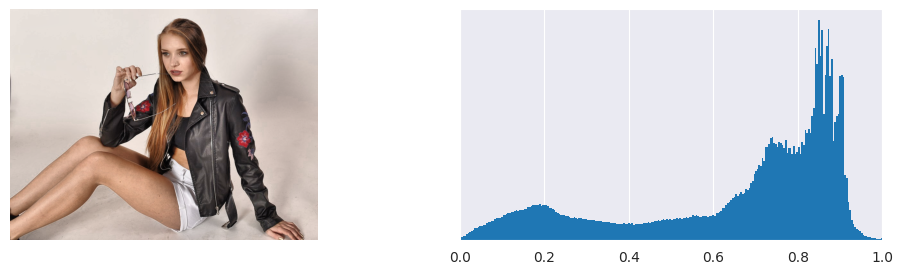

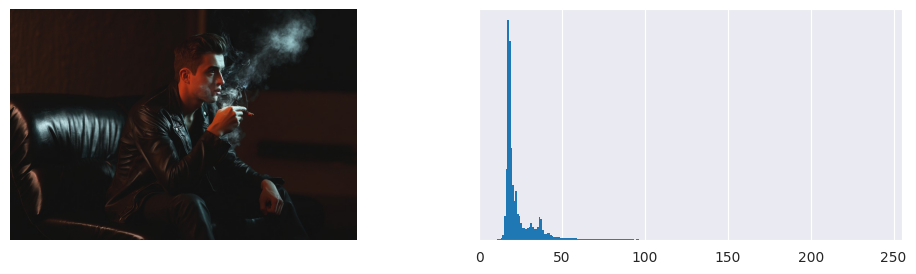

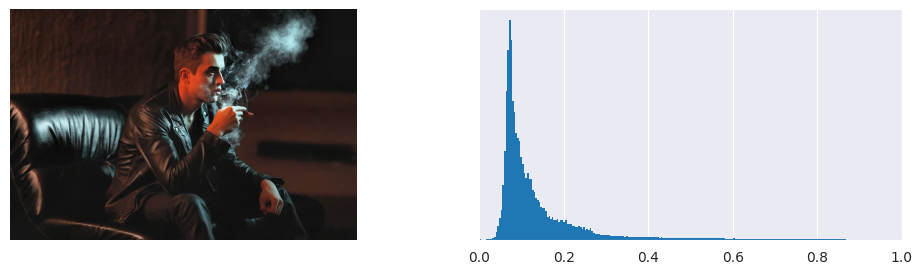

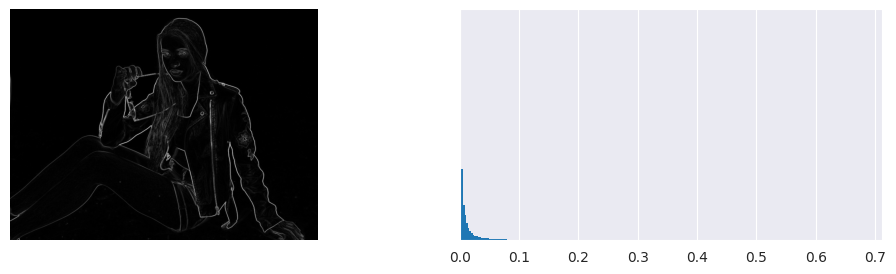

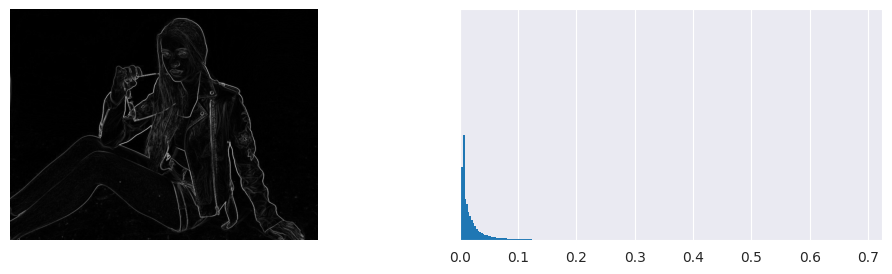

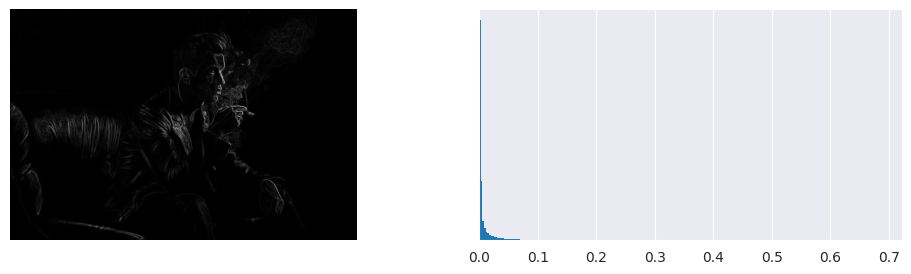

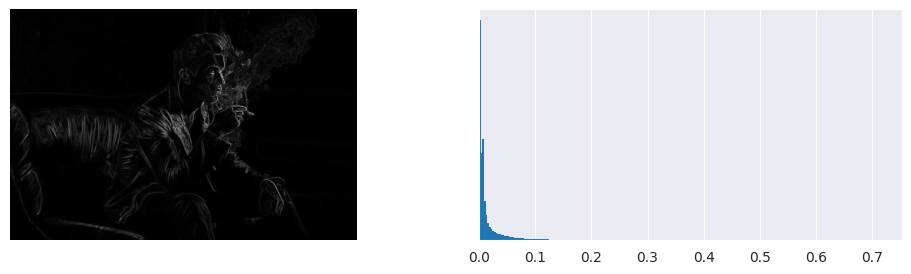

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import skimage.exposure as skie
%matplotlib inline


image_path_1 = '/content/drive/MyDrive/CapstoneData/not_smoking/ggg723.jpg'
src1 = cv2.imread(image_path_1)
image_path_2 = '/content/drive/MyDrive/CapstoneData/smoking/ggg063.jpg'
src2 = cv2.imread(image_path_2)

image_1 = cv2.cvtColor(src1, cv2.COLOR_RGB2BGR)
image_2 = cv2.cvtColor(src2, cv2.COLOR_RGB2BGR)

def show(img):
    # Display the image
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()

    # Display the histogram
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])
    plt.show()
show(image_1)
# adaptive histogram equalisation
show(skie.equalize_adapthist(image_1))

show(image_2)
# adaptive histogram equalisation
show(skie.equalize_adapthist(image_2))

#Image 1
img = skic.rgb2gray(image_1)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(image_1))
sobimg_heq_1 = skif.sobel(img)
show(sobimg_heq_1)
#Image 2
img = skic.rgb2gray(image_2)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(image_2))
sobimg_heq_2 = skif.sobel(img)
show(sobimg_heq_2)

/content/drive/MyDrive/CapstoneData/not_smoking 935
/content/drive/MyDrive/CapstoneData/smoking 1882


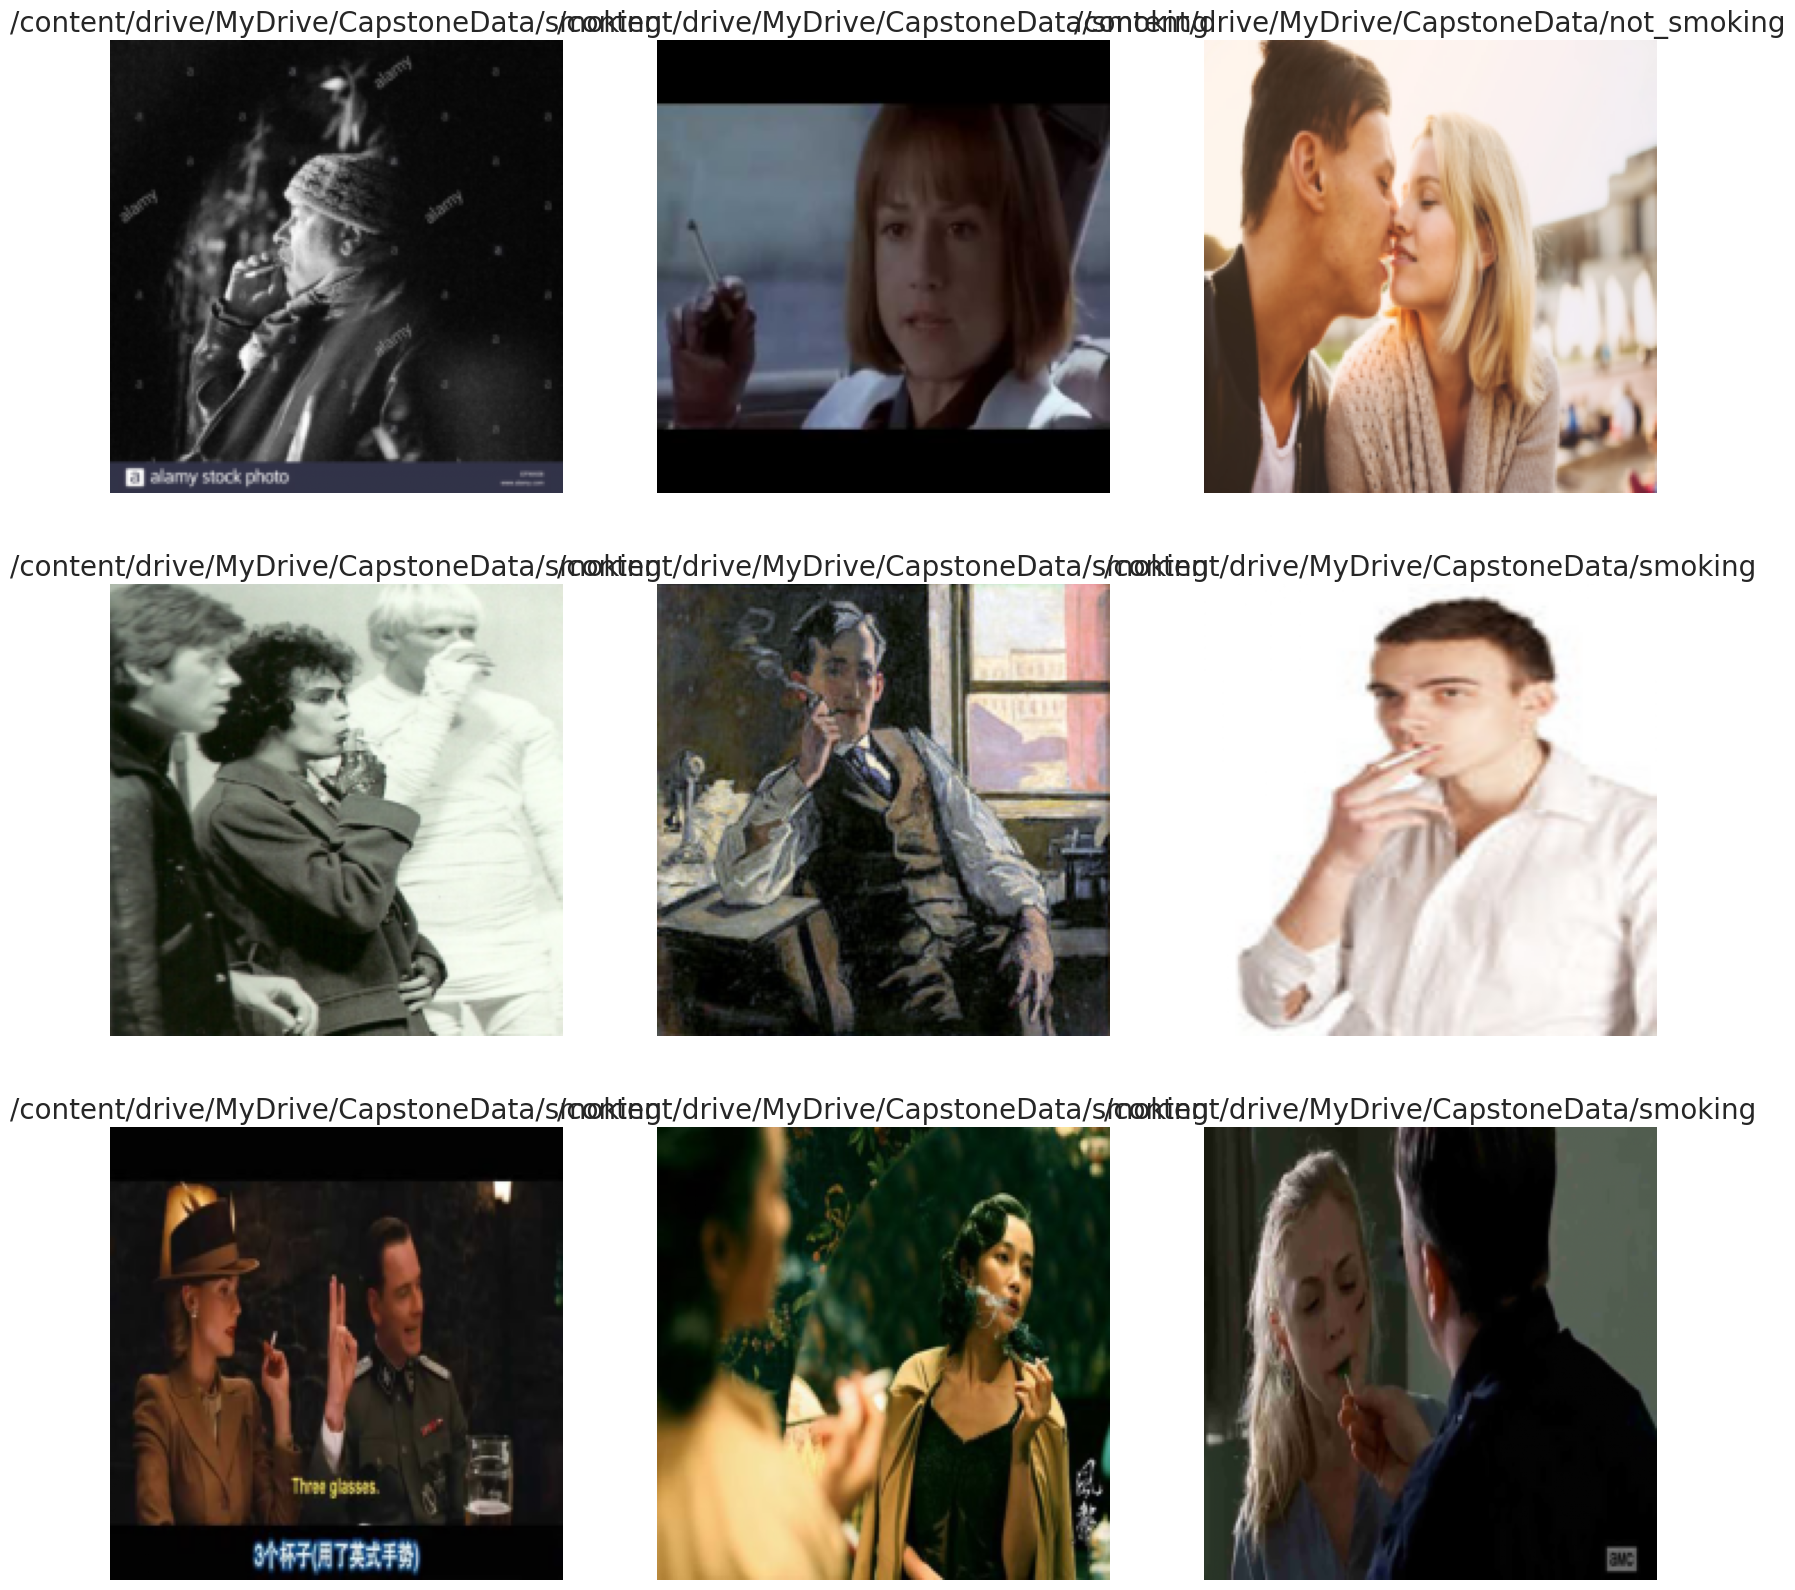

In [ ]:
%matplotlib inline
import numpy as np
from skimage.io import imread
from skimage.color import gray2rgb
from skimage.transform import resize
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from glob import glob
from matplotlib import pyplot as plt

images = []
X, y = [], []
ppc = 16
sz = 200
img_path = '/content/drive/MyDrive/CapstoneData/*'
for dir in glob(img_path):
    image_files = glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = resize(imread(image_file), (sz,sz))
        images.append(image)
        X.append(images)
        y.append(label)

n = 3
indices = np.random.choice(len(images), n*n)
plt.figure(figsize=(20,20))
plt.gray()
i = 1
for index in indices:
    plt.subplot(n,n,i), plt.imshow(images[index]), plt.axis('off'), plt.title(y[index], size=20)
    i += 1
plt.show()
